## Домашняя работа по базовой математической статистике для Data scientist

Задания со зведочкой не обязательны для зачета.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
from statistics import variance
import statsmodels.api as sm


df = pd.read_csv("bikeshare.csv")
del df['datetime']

### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>, <Axes: >]], dtype=object)

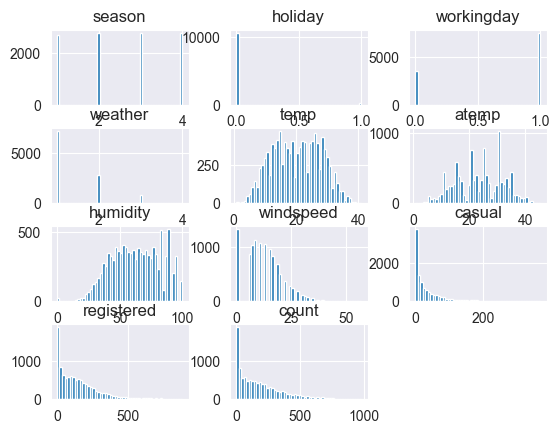

In [2]:
df.hist(bins=50)

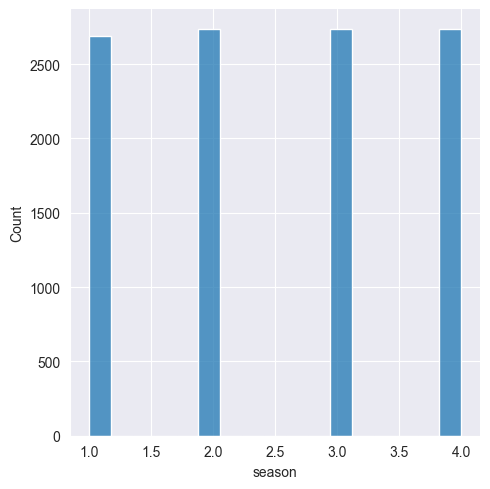

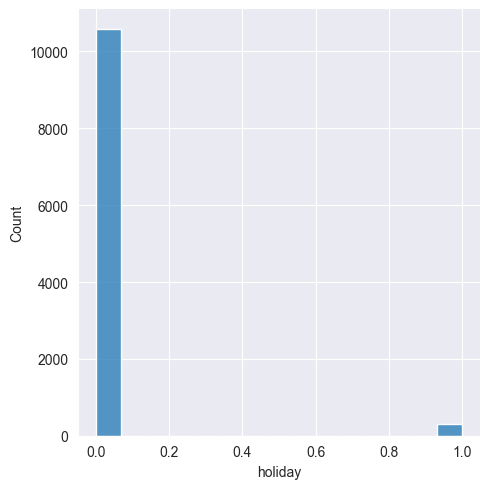

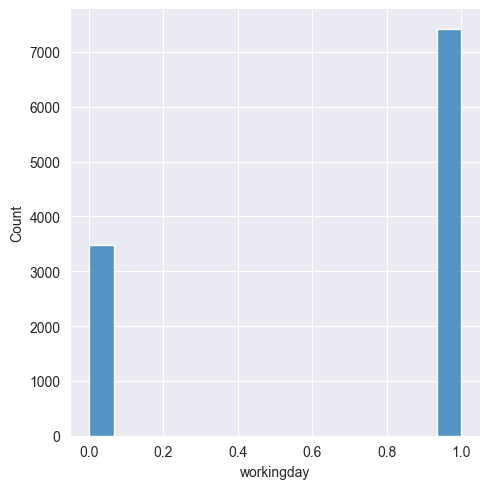

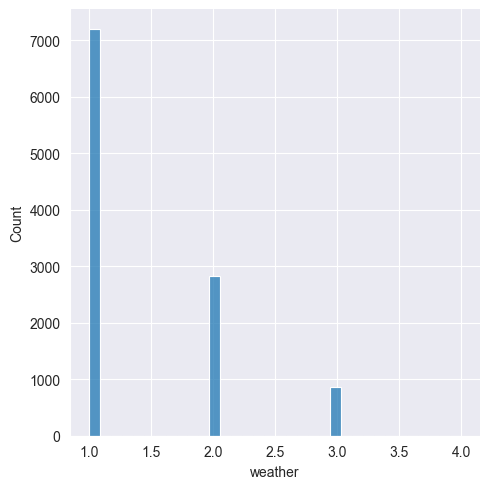

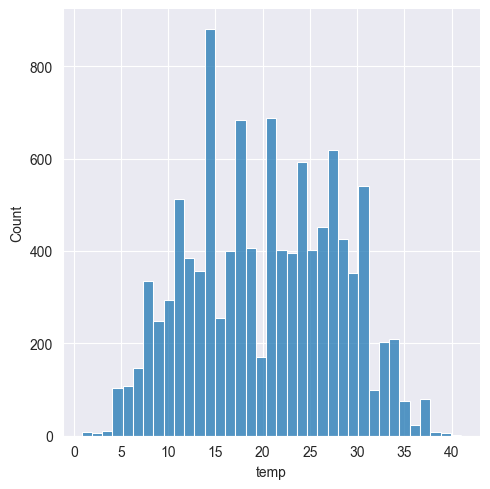

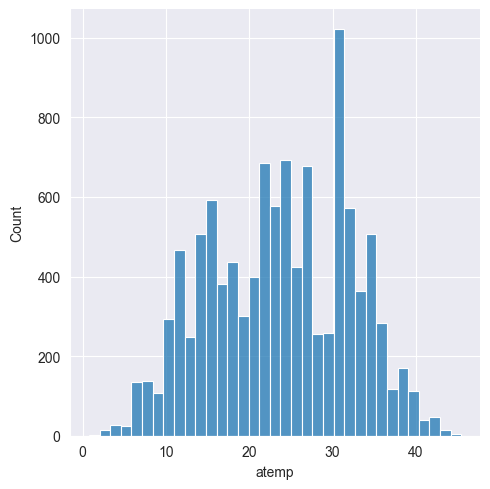

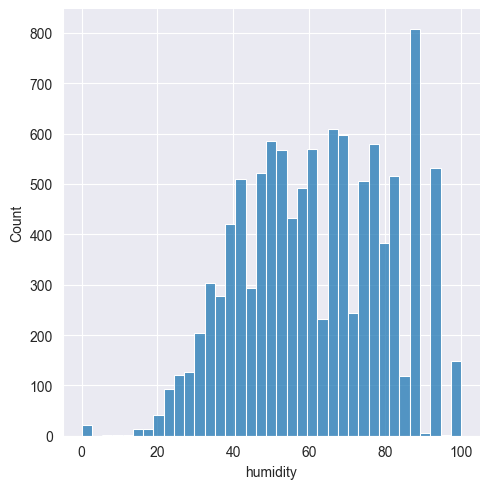

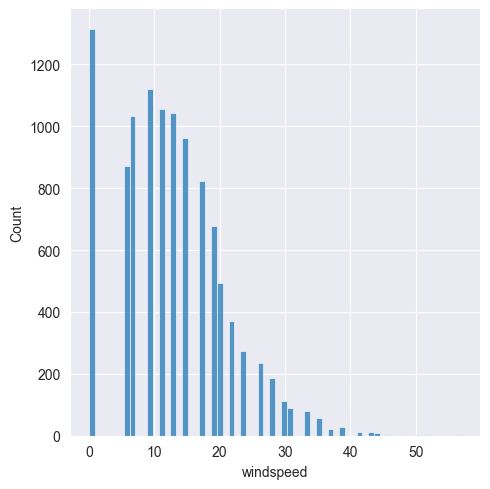

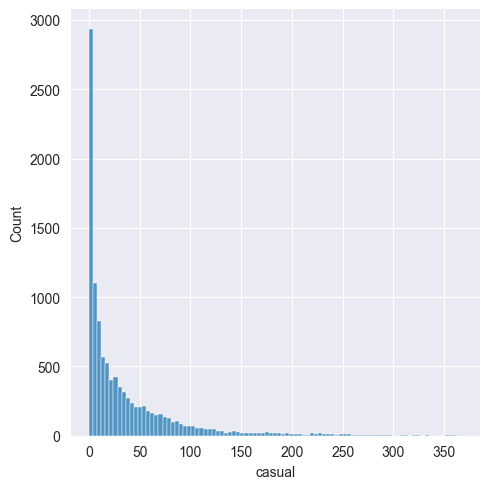

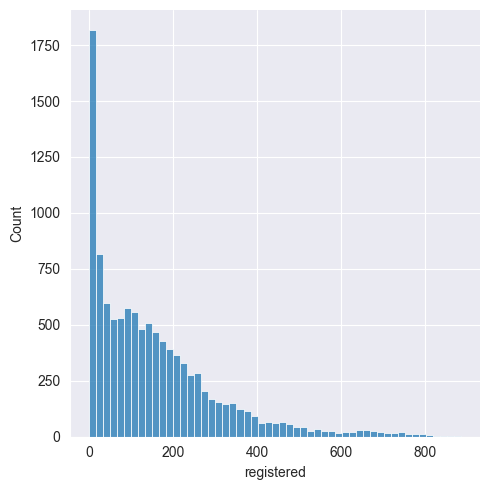

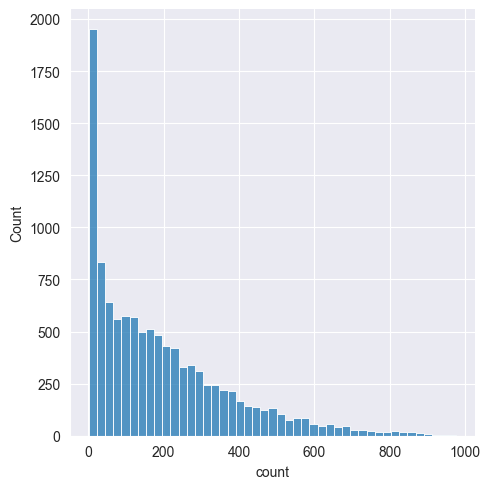

In [3]:
# seaborn
for i in df.columns:
    print(sns.displot(df[f'{i}']))

### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [4]:
# среднее
for i in df.columns:
    print(f'{i} mean is ', round(df[f'{i}'].mean(), 2))

season mean is  2.51
holiday mean is  0.03
workingday mean is  0.68
weather mean is  1.42
temp mean is  20.23
atemp mean is  23.66
humidity mean is  61.89
windspeed mean is  12.8
casual mean is  36.02
registered mean is  155.55
count mean is  191.57


In [5]:
# дисперсия
for i in df.columns:
    print(f'{i} variance is ', round(variance(df[f'{i}']), 2))

season variance is  1.25
holiday variance is  0.03
workingday variance is  0.22
weather variance is  0.4
temp variance is  60.71
atemp variance is  71.82
humidity variance is  370.37
windspeed variance is  66.66
casual variance is  2496.05
registered variance is  22812.79
count variance is  32813.31


In [6]:
# 50 перцентиль
for i in df.columns:
    print(f'{i} 50th percentile is ', np.percentile(df[f'{i}'], 50))

season 50th percentile is  3.0
holiday 50th percentile is  0.0
workingday 50th percentile is  1.0
weather 50th percentile is  1.0
temp 50th percentile is  20.5
atemp 50th percentile is  24.24
humidity 50th percentile is  62.0
windspeed 50th percentile is  12.998
casual 50th percentile is  17.0
registered 50th percentile is  118.0
count 50th percentile is  145.0


In [7]:
# 75 перцентиль
for i in df.columns:
    print(f'{i} 50th percentile is ', np.percentile(df[f'{i}'], 75))

season 50th percentile is  4.0
holiday 50th percentile is  0.0
workingday 50th percentile is  1.0
weather 50th percentile is  2.0
temp 50th percentile is  26.24
atemp 50th percentile is  31.06
humidity 50th percentile is  77.0
windspeed 50th percentile is  16.9979
casual 50th percentile is  49.0
registered 50th percentile is  222.0
count 50th percentile is  284.0


In [8]:
# 99 перцентиль
for i in df.columns:
    print(f'{i} 50th percentile is ', round(np.percentile(df[f'{i}'], 99), 4))

season 50th percentile is  4.0
holiday 50th percentile is  1.0
workingday 50th percentile is  1.0
weather 50th percentile is  3.0
temp 50th percentile is  36.08
atemp 50th percentile is  40.15
humidity 50th percentile is  100.0
windspeed 50th percentile is  35.0008
casual 50th percentile is  240.15
registered 50th percentile is  697.0
count 50th percentile is  774.15


In [9]:
# мода
for i in df.columns:
    print(df[f'{i}'].value_counts().nlargest(3))

season
4    2734
2    2733
3    2733
Name: count, dtype: int64
holiday
0    10575
1      311
Name: count, dtype: int64
workingday
1    7412
0    3474
Name: count, dtype: int64
weather
1    7192
2    2834
3     859
Name: count, dtype: int64
temp
14.76    467
26.24    453
28.70    427
Name: count, dtype: int64
atemp
31.060    671
25.760    423
22.725    406
Name: count, dtype: int64
humidity
88    368
94    324
83    316
Name: count, dtype: int64
windspeed
0.0000     1313
8.9981     1120
11.0014    1057
Name: count, dtype: int64
casual
0    986
1    667
2    487
Name: count, dtype: int64
registered
3    195
4    190
5    177
Name: count, dtype: int64
count
5    169
4    149
3    144
Name: count, dtype: int64


In [10]:
# describe
for i in df.columns:
    print(df[f'{i}'].describe())

count    10886.000000
mean         2.506614
std          1.116174
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: season, dtype: float64
count    10886.000000
mean         0.028569
std          0.166599
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: holiday, dtype: float64
count    10886.000000
mean         0.680875
std          0.466159
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: workingday, dtype: float64
count    10886.000000
mean         1.418427
std          0.633839
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: weather, dtype: float64
count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: 

### 3. (*) 
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [11]:
# Ассиметрия
for i in df.columns:
    print(skew(df[f'{i}']))

-0.007074695296526289
5.6597371332540805
-0.7760560687198784
1.2433126730817885
0.0036903358354289715
-0.10254538108264065
-0.0863232869219358
0.5886853963635482
2.495404491505502
1.5245944734221468
1.241895058803035


In [12]:
# Эксцесс
for i in df.columns:
    print(kurtosis(df[f'{i}']))

-1.3555899543299803
30.032624417535125
-1.3977369782030475
0.39480007841067577
-0.9146613849825282
-0.8502363689497141
-0.760019710012902
0.629292367034056
7.547610130561701
2.6243238654959855
1.2989447727380323


### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95.

In [13]:
variable = 'atemp'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 935.6 KB


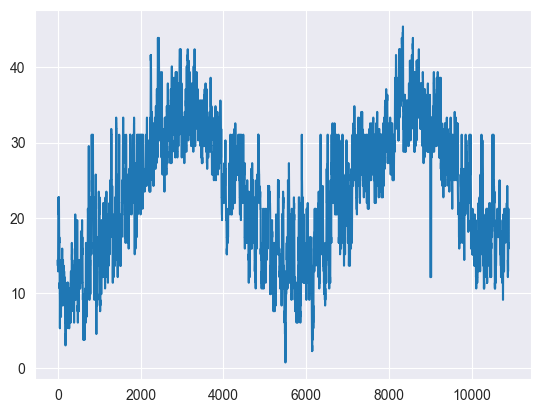

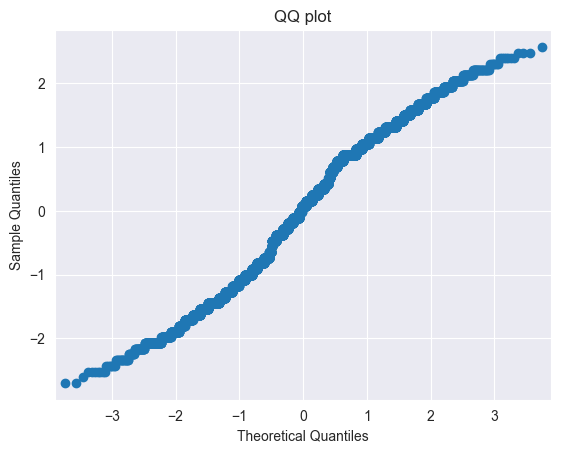

In [14]:
df.info()
df
df[variable].plot()

sm.qqplot(df[variable], fit = True)
plt.title("QQ plot")
plt.show()

In [15]:
def my_norm_confidence(df=df, column = variable, alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std())
    return interval

In [16]:
confidence = my_norm_confidence()
print(confidence)

(7.045172041640921, 40.26499606418308)


Text(0.5, 1.0, 'Доверительный интервал')

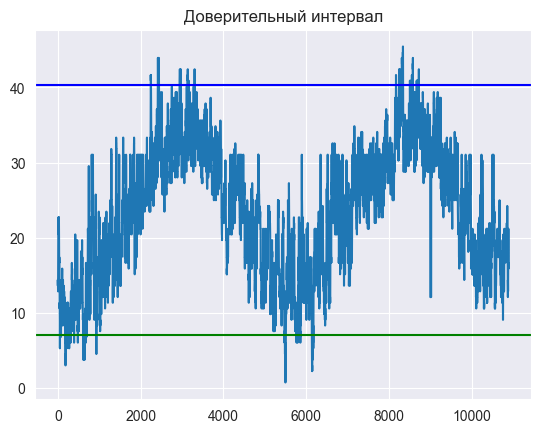

In [17]:
df[variable].plot()
plt.axhline(y=confidence[1], color="b", linestyle="-")
plt.axhline(y=confidence[0], color="g", linestyle="-")
plt.title("Доверительный интервал")

### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

In [18]:
df["anomaly_big"] = np.where(df[variable] > confidence[1], 1,0)
df[df.anomaly_big == 1].describe()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,anomaly_big
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.0
mean,2.817308,0.057692,0.586538,1.086538,37.018269,41.936202,39.721154,14.663337,81.673077,220.336538,302.009615,1.0
std,0.388285,0.234290,0.494839,0.344459,1.329685,1.091213,8.789288,7.714065,48.373635,112.163249,142.666458,0.0
min,2.000000,0.000000,0.000000,1.000000,33.620000,40.910000,19.000000,0.000000,15.000000,74.000000,94.000000,1.0
25%,3.000000,0.000000,0.000000,1.000000,36.080000,40.910000,33.000000,11.001400,40.000000,135.500000,169.750000,1.0
50%,3.000000,0.000000,1.000000,1.000000,36.900000,41.665000,37.500000,15.001300,74.000000,195.500000,282.000000,1.0
75%,3.000000,0.000000,1.000000,1.000000,37.720000,42.425000,42.000000,19.999500,111.250000,274.250000,394.000000,1.0
max,3.000000,1.000000,1.000000,3.000000,41.000000,45.455000,63.000000,35.000800,208.000000,675.000000,770.000000,1.0


Text(0.5, 1.0, '3 sigma и 99 квантиль для нормального распределения')

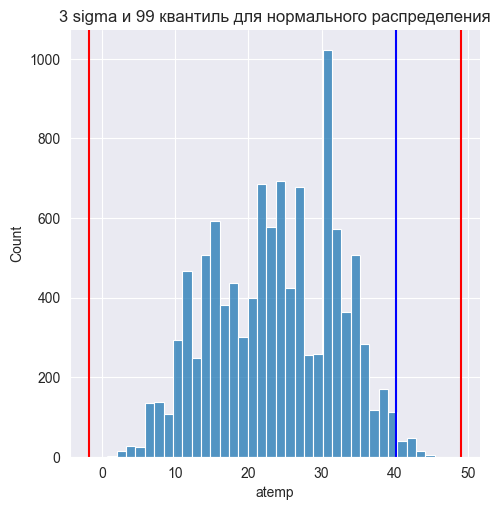

In [19]:
upper_level = df[variable].mean() + 3*df[variable].std()
lower_level = df[variable].mean() - 3*df[variable].std()
level_99 = np.percentile(df[variable], 99)


sns.displot(df[variable])
plt.axvline(x=lower_level, color="r", linestyle="-")
plt.axvline(x=upper_level, color="r", linestyle="-")
plt.axvline(x=level_99, color="b", linestyle="-")
plt.title("3 sigma и 99 квантиль для нормального распределения")

In [20]:
df[df[variable] >= upper_level].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,anomaly_big
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


-1.7687178265428436 49.078885932366845
40.15


Text(0.5, 1.0, '3 sigma и 99 квантиль для бимодального распределения')

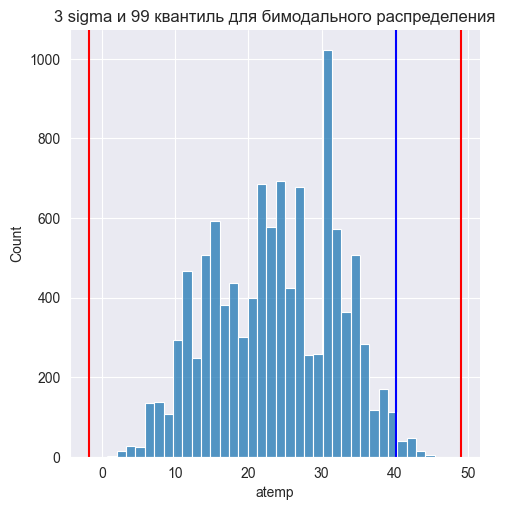

In [21]:
b_upper_level = df[variable].mean() + 3*df[variable].std()
b_lower_level = df[variable].mean() - 3*df[variable].std()
print(lower_level,upper_level)

b_level_99 = np.percentile(df[variable], 99)
print(level_99)

sns.displot(df[variable])
plt.axvline(x=b_lower_level, color="r", linestyle="-")
plt.axvline(x=b_upper_level, color="r", linestyle="-")
plt.axvline(x=b_level_99, color="b", linestyle="-")
plt.title("3 sigma и 99 квантиль для бимодального распределения")

In [22]:
def find_anomaly(df, column):
    upper_level = df[column].mean() + 3*df[column].std()
    level_99 = np.percentile(df[column], 99)
    anomaly = df[(df[column] >= upper_level)^(df[column] >= level_99)]
    return anomaly,upper_level,level_99

In [23]:
anomaly = find_anomaly(df=df, column = variable)
len(anomaly[0])/len(df)

0.013687304795149733

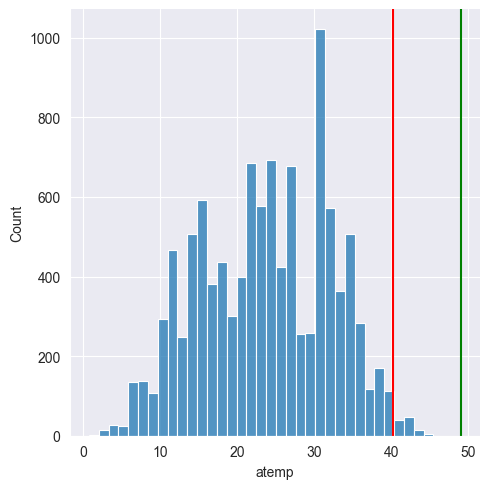

In [24]:
sns.displot(df[variable])
plt.axvline(x=anomaly[1], color="g", linestyle="-")
plt.axvline(x=anomaly[2], color="r", linestyle="-")

### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

In [25]:
df.corr().round(3)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,anomaly_big
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,0.027339
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.017170
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.019876
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.051428
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.211614
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.211870
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.113121
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,0.022423
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.089745
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.042128


<Axes: >

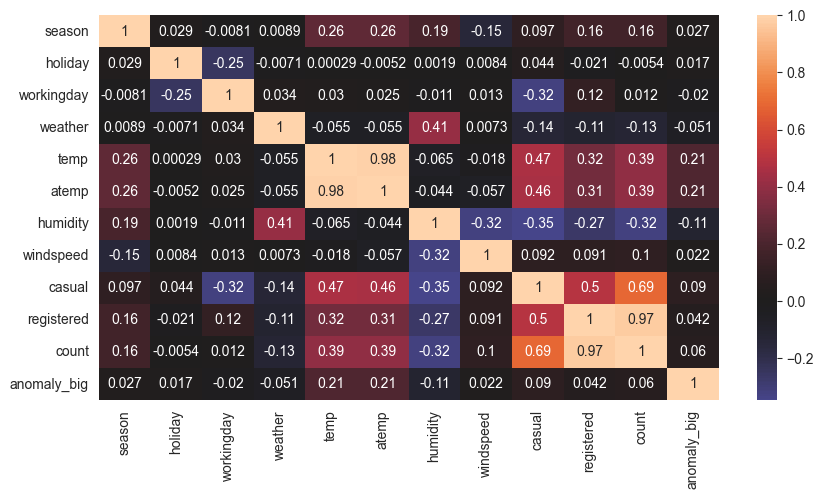

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(corr, center=0, annot=True)

при более тёплой погоде аренда велосипедов увеличивается